In [2]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch.nn.functional as F

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]


'POSITIVE'

In [3]:
import torch.nn.functional as F


In [4]:
import torch
import torch.nn.functional as F

def get_sentiment_score(text, model, tokenizer):
    encoded_input = tokenizer(text, return_tensors="pt")
    if encoded_input["input_ids"].shape[1]>512:
        encoded_input["input_ids"] = encoded_input["input_ids"][:,0:512]
        encoded_input["attention_mask"] = encoded_input["attention_mask"][:,0:512]
    with torch.no_grad():
        logits = model(**encoded_input).logits
        probabilities = F.softmax(logits, dim=-1)
    predicted_class_id = logits.argmax().item()
    label = model.config.id2label[predicted_class_id]
    score = probabilities[0][1].numpy()
    return float(score),label


In [5]:
import torch
import torch.nn.functional as F

def get_batch_sentiment_score(texts, model, tokenizer):
    # Tokenize the batch of texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    
    with torch.no_grad():
        # Forward pass, get logits for all texts in the batch
        logits = model(**inputs).logits
        # Calculate probabilities
        probabilities = F.softmax(logits, dim=-1)
    
    # Get the predicted class IDs and labels for the entire batch
    predicted_class_ids = logits.argmax(dim=-1).tolist()
    labels = [model.config.id2label[class_id] for class_id in predicted_class_ids]
    
    # Extract the scores for the "positive" class (assuming class 1 is "positive")
    scores = probabilities[:, 1].tolist()
    
    # Return a list of tuples containing the score and label for each text
    return [(float(score), label) for score, label in zip(scores, labels)]


In [6]:

get_batch_sentiment_score(["perfect","bad","good"],model, tokenizer)

[(0.9998517036437988, 'POSITIVE'),
 (0.0002176662237616256, 'NEGATIVE'),
 (0.9998161196708679, 'POSITIVE')]

In [7]:
import pandas as pd

In [8]:
def clean_text(lor):
    lor = re.sub(r"\n"," ",lor)
    lor = re.sub(r"\"","",lor)
    lor = re.sub(r"\\","",lor)
    lor = re.sub(r"\(","",lor)
    lor = re.sub(r"\)","",lor)
    lor = re.sub(r"\s+"," ",lor)
    return lor

In [9]:
df = pd.read_excel("df_all_data_foreign_included.xlsx")

In [10]:
df.gender = df.gender.str.strip()

In [11]:
df.gender.value_counts()

gender
male      261
female     73
Name: count, dtype: int64

In [12]:

#%%
applicant_columns = ['applicant_id', 'application_year', 'birth_year', 'citizenship',"foreign",
       'medical_school', 'residency_school', 'md_year', 'residency_year',
       'step1', 'step2', 'step3', 'step_old', 'IMG', 'class_rank', 'honors',
       'received_offer', 'language_skills', 'interests',
       'number_of_publications', 'speciality', 'gender']

# %%
from collections import defaultdict
df_dic = defaultdict(list)
#%%
for inx,row in df.iterrows():
    for lor in ["lor1","lor2","lor3","lor4"]:
        for column in applicant_columns:
            df_dic[column].append(row[column])
        df_dic["lor"].append(row[lor])
        df_dic["lor_position"].append(row[lor + "_position"])
        df_dic["lor_university"].append(row[lor + "_university"])
        df_dic["lor_gender"].append(row[lor + "_gender"])
        df_dic["lor_number"].append(lor)
  
# %%
df_new = pd.DataFrame(df_dic)

# %%
df_new = df_new.dropna(subset=["lor"])

#%%


In [13]:
df_new.applicant_id.unique().shape
#%%


(336,)

In [14]:
df_male = df_new.loc[(df_new.gender == "male")]
df_female = df_new.loc[df_new.gender == "female"]
# %%

In [15]:
import re

In [16]:
df_new["lor"] = df_new["lor"].apply(clean_text)
#%%
df_new["lor_id"] = df_new.index
# %%


In [17]:
import joblib
#joblib.dump(df_new, "df_new.h5")

In [18]:
df_male = df_new.loc[(df_new.gender == "male")]
df_female = df_new.loc[df_new.gender == "female"]
# %%


In [19]:
df_male = df_new.loc[(df_new.gender == "male")]
df_female = df_new.loc[df_new.gender == "female"]
# %%

In [20]:
df = v
sentence_column = "lor"

In [ ]:
    scores_list = [0]*df[sentence_column].shape[0]
    for inx,sentence in enumerate(df[sentence_column].values):
        score = get_sentiment_score(sentence)
        scores_list[inx] = score
    scores_array = np.array(scores_list)

    df[["negative","neutral","positive"]] = scores_array

    df["sentiment"] = [labels[i] for i in np.argmax(scores_array,axis=1)]

    df = df.loc[df["sentiment"] !="neutral"]

    df["score"] = [-row.negative if row.sentiment == "negative" else row.positive for inx,row in df.iterrows()]
    
    if drop_sent_scores:
        df = df.drop(columns=["negative","neutral","positive"])

In [74]:
get_sentiment_score("good",model,tokenizer)

(0.9998161196708679, 'POSITIVE')

In [75]:
import numpy as np

In [ ]:
import 

In [21]:
def get_sentiment_df(df,sentence_column,drop_sent_scores = True):
    labels = []
    scores_list = [0]*df[sentence_column].shape[0]
    for inx,sentence in enumerate(df[sentence_column].values):
        score,label = get_sentiment_score(sentence,model,tokenizer)
        scores_list[inx] = score
        labels.append(label)
    scores_array = np.array(scores_list)
    label_array = np.array(labels)

    df[["score"]] = scores_array

    df["sentiment"] = label_array

        
    return df

In [29]:
df.shape

(805, 28)

In [28]:
scores_array.shape

(805,)

In [30]:
df["score"] = scores_array

/var/folders/2d/h_d60xcn74g40sph_y8x7v7m0000gn/T/ipykernel_5691/1690692483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["score"] = scores_array


In [31]:
df["score"] = scores_array
df["sentiment"] = label_array

/var/folders/2d/h_d60xcn74g40sph_y8x7v7m0000gn/T/ipykernel_5691/1964550580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = label_array


<Axes: >

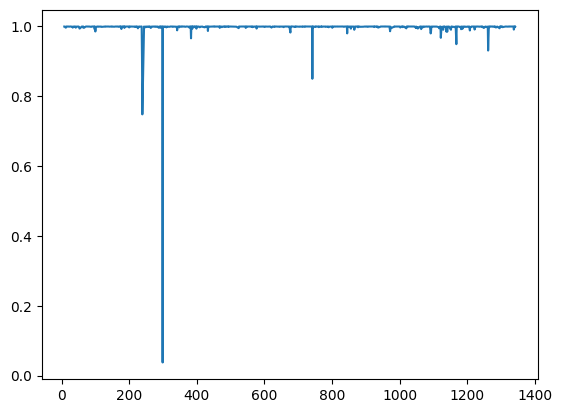

In [50]:
df.score.plot()

In [34]:
labels = []
scores_list = [0]*df_male[sentence_column].shape[0]
for inx,sentence in enumerate(df_male[sentence_column].values):
    score,label = get_sentiment_score(sentence,model,tokenizer)
    scores_list[inx] = score
    labels.append(label)
scores_array_male = np.array(scores_list)
label_array_male = np.array(labels)

In [35]:
labels = []
scores_list = [0]*df_female[sentence_column].shape[0]
for inx,sentence in enumerate(df_female[sentence_column].values):
    score,label = get_sentiment_score(sentence,model,tokenizer)
    scores_list[inx] = score
    labels.append(label)
scores_array_female = np.array(scores_list)
label_array_female = np.array(labels)

In [37]:
df_male["score"] = scores_array_male
df_male["sentiment"] = label_array_male
df_female["score"] = scores_array_female
df_female["sentiment"] = label_array_female

/var/folders/2d/h_d60xcn74g40sph_y8x7v7m0000gn/T/ipykernel_5691/1727189717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male["score"] = scores_array_male
/var/folders/2d/h_d60xcn74g40sph_y8x7v7m0000gn/T/ipykernel_5691/1727189717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male["sentiment"] = label_array_male
/var/folders/2d/h_d60xcn74g40sph_y8x7v7m0000gn/T/ipykernel_5691/1727189717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [45]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

# Assuming 'Score' is the column from which you want to remove outliers
df_male_filtered = remove_outliers(df_male, 'score')
df_female_filtered = remove_outliers(df_female, 'score')

# Now df1_filtered and df2_filtered have outliers removed based on the 'Score' column.


In [46]:
import pandas as pd
from scipy import stats

# Assuming df1 and df2 are your dataframes and 'score' is the column of interest

# Example dataframes
# df1 = pd.DataFrame({'score': [scores for group 1]})
# df2 = pd.DataFrame({'score': [scores for group 2]})

# Shapiro-Wilk test for normality
w1, p1 = stats.shapiro(df_male_filtered['score'])
w2, p2 = stats.shapiro(df_female_filtered['score'])

print(f"Group 1 - Shapiro-Wilk test statistic: {w1}, p-value: {p1}")
print(f"Group 2 - Shapiro-Wilk test statistic: {w2}, p-value: {p2}")

# Interpretation of normality test results
alpha = 0.05
if p1 > alpha:
    print("Group 1's score distribution looks Gaussian (fail to reject H0)")
else:
    print("Group 1's score distribution does not look Gaussian (reject H0)")

if p2 > alpha:
    print("Group 2's score distribution looks Gaussian (fail to reject H0)")
else:
    print("Group 2's score distribution does not look Gaussian (reject H0)")

# Levene's test for equality of variances
stat, p = stats.levene(df_male_filtered['score'], df_female_filtered['score'])

print(f"Levene’s test statistic: {stat}, p-value: {p}")

# Interpretation of Levene's test results
if p > alpha:
    print("The variances of the two groups are equal (fail to reject H0)")
else:
    print("The variances of the two groups are not equal (reject H0)")


Group 1 - Shapiro-Wilk test statistic: 0.8036903738975525, p-value: 3.194187312834042e-28
Group 2 - Shapiro-Wilk test statistic: 0.7969430088996887, p-value: 3.770634080305351e-15
Group 1's score distribution does not look Gaussian (reject H0)
Group 2's score distribution does not look Gaussian (reject H0)
Levene’s test statistic: 2.3545852651537595, p-value: 0.12527089384759096
The variances of the two groups are equal (fail to reject H0)


In [51]:
df_male_filtered.shape

(697, 30)

In [52]:
df_female_filtered.shape

(194, 30)

In [47]:
import pandas as pd
from scipy import stats

# Assuming df1 and df2 are your DataFrames and 'score' is the column of interest
score_group1 = df_male_filtered['score']
score_group2 = df_female_filtered['score']

# Perform the Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(score_group1, score_group2)

print(f'Mann-Whitney U statistic: {u_statistic}, p-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference between the two groups.')
else:
    print('There is no significant difference between the two groups.')


Mann-Whitney U statistic: 61083.0, p-value: 0.03956305944824627
There is a significant difference between the two groups.


In [42]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


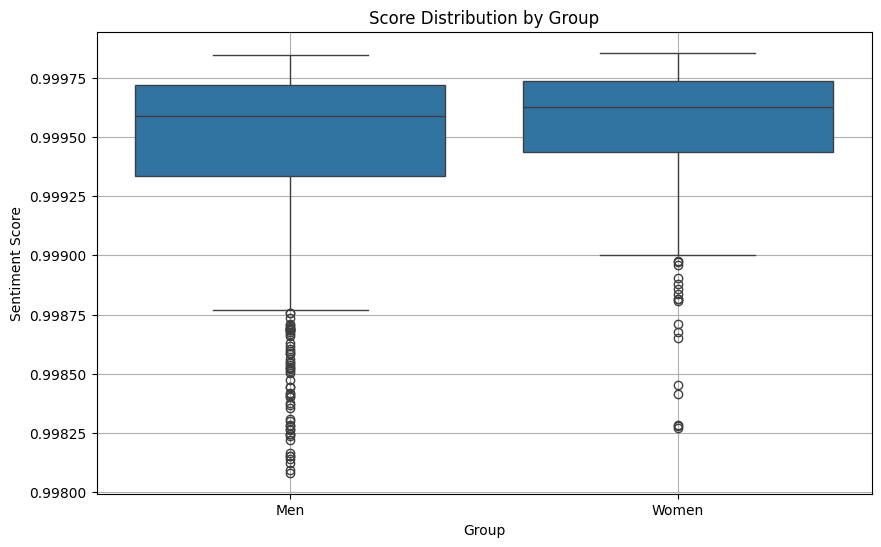

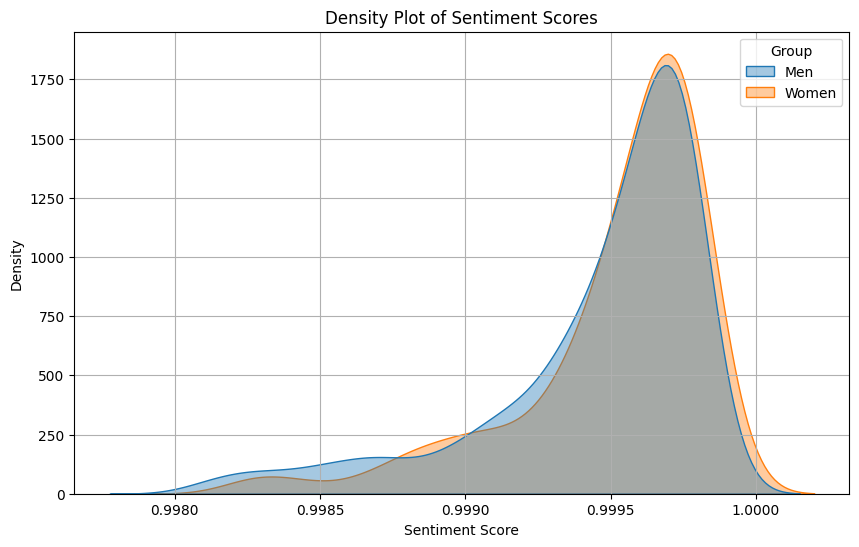

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical DataFrames
np.random.seed(42)  # For reproducibility
df1_scores = score_group1
df2_scores = score_group2

df1 = pd.DataFrame({'Group': 'Men', 'Score': df1_scores})
df2 = pd.DataFrame({'Group': 'Women', 'Score': df2_scores})

# Combine for plotting
combined_df = pd.concat([df1, df2])

# Boxplot to show distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Score', data=combined_df)
plt.title('Score Distribution by Group')
plt.ylabel('Sentiment Score')
plt.xlabel('Group')
plt.grid(True)
plt.show()

# Density Plot to show distribution density and overlap
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='Score', hue='Group', fill=True, common_norm=False, alpha=0.4)
plt.title('Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


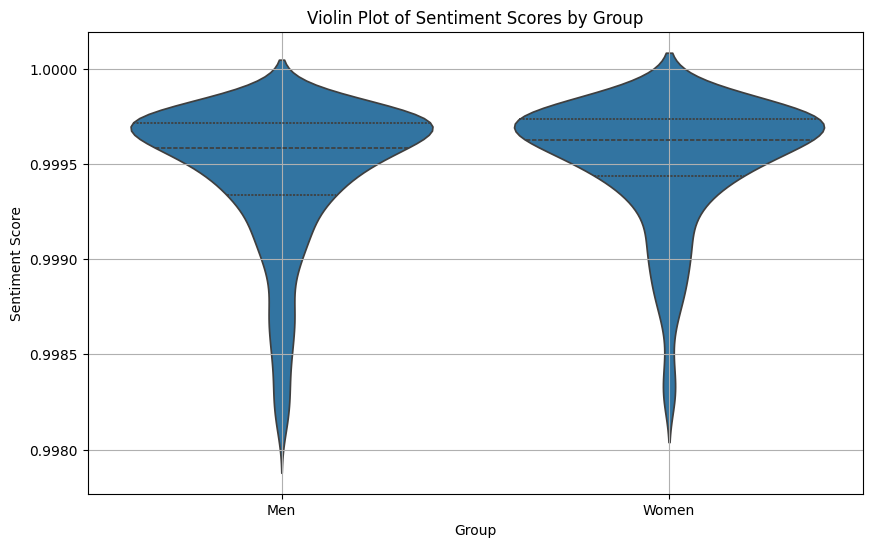

In [49]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Score', data=combined_df, inner='quartile')
plt.title('Violin Plot of Sentiment Scores by Group')
plt.ylabel('Sentiment Score')
plt.xlabel('Group')
plt.grid(True)
plt.show()